Diabetes Risk Factors: Investigating Pima Indians Dataset
+ Tổng quan bài toán:
- Dự án này nhằm mục đích phát triển một mô hình dự đoán mạnh mẽ để phát hiện bệnh tiểu đường ở các cá nhân dựa trên các số liệu sức khỏe khác nhau. Tận dụng bộ dữ liệu Pima Indians toàn diện, bao gồm các tính năng như mức glucose, BMI, tuổi tác, v.v., mục tiêu của chúng tôi là tạo ra một mô hình có khả năng xác định chính xác các cá nhân mắc bệnh tiểu đường. Do tầm quan trọng của việc phát hiện sớm và can thiệp trong quản lý bệnh tiểu đường, trọng tâm chính của chúng tôi nằm ở việc tối đa hóa khả năng của mô hình để phân loại chính xác các trường hợp dương tính (bệnh nhân tiểu đường), làm cho việc nhớ lại lớp dương tính trở thành một thước đo quan trọng.
+ Mục Tiêu:
1) Explore the Dataset: Điều tra các mẫu, phân phối và mối quan hệ trong dữ liệu.
2) Conduct Extensive Exploratory Data Analysis (EDA): Đi sâu vào các mối quan hệ hai biến so với biến đích.
3) Preprocessing Steps:
- Xóa các tính năng không liên quan
- xử lý các giá trị thiếu
- xử lý ngoại lệ
- chuẩn hóa các biến phân loại
- Chuyển đổi các tính năng bị lệch để đạt được các bản phân phối giống như bình thường
+ Model Building:
- Thiết lập quy trình cho các mô hình yêu cầu mở rộng quy mô
- Thực hiện và điều chỉnh mô hình phân loại bao gồm KNN.
- Nhấn mạnh việc đạt được khả năng thu hồi cao đối với loại 1, đảm bảo xác định toàn diện các cá nhân mắc bệnh tiểu đường
+ Evaluate and Compare Model Performance: Utilize precision, recall, and F1-score to assess the effectiveness of the models.

In [49]:
# Installing select libraries:
from gc import collect; # garbage collection to free up memory
from warnings import filterwarnings; # handle warning messages
from scipy import stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # data visualization
from matplotlib.colors import ListedColormap  # Importing colormap for scatter plot
import seaborn as sns # statistical data visualization

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier # implementing the K-Nearest Neighbors algorithm for continous value predict
from sklearn.model_selection import train_test_split # splitting data into training and testing sets

from sklearn.metrics import accuracy_score # evaluating the accuracy of the classifier
from sklearn.preprocessing import LabelEncoder # encode categorical labels into numerical labels
from sklearn.preprocessing import OneHotEncoder, StandardScaler # categorical variables into numerical format & Standardize the feature variables



Step - 1 | Preparing the Data

In [50]:
# Attempt to read the dataset
df = pd.read_csv('diabetes.csv')

Step 1.1 | 📠 Data Information

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [53]:
# Checking the data shape
print(f'The dataset contains: ', df.shape[0])
print(f'Columns: ', df.shape[1])

The dataset contains:  768
Columns:  9


In [54]:
df['Outcome'].is_unique

False

Step 1.2 | 📠 🧹 Missing Value Handling Strategies

In [55]:
# Example usage:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

checks for duplicates among the columns of the DataFrame

In [56]:
def check_duplicate_columns(df):
    duplicate_cols = df.T.duplicated(keep=False)
    duplicate_columns = df.columns[duplicate_cols].tolist()
    return duplicate_columns

In [57]:
styled_df = check_duplicate_columns(df)
styled_df

[]

Step -2 | Data Preprocessning

Step 2.1 | 📏 Statistical Data Summary

In [58]:
# Calculate statistics with the modified DataFrame
# from calculate_full_statistics import calculate_full_statistics
# calculate_full_statistics(df)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


chuẩn hóa tính toán 

+ tính toán Range = Max - Min:
1) Mang thai: Số lần mang thai trung bình là khoảng 4, với trung vị là 3 và chế độ 1. Phạm vi kéo dài từ 0 đến 17 lần mang thai, với độ lệch chuẩn là 3,37.
2) glucose: Mức glucose trung bình là khoảng 120,89 mg / dl, với mức trung bình là 117,00 mg / dl và chế độ 99,00 mg / dl. Nồng độ glucose dao động từ 0 đến 199 mg / dl, với độ lệch chuẩn là 31,97 mg / dl.
3) blood_pressure: Huyết áp trung bình là khoảng 69,11 mm Hg, với trung bình là 72,00 mm Hg và chế độ 70,00 mm Hg. Huyết áp dao động từ 0 đến 122 mm Hg, với độ lệch chuẩn là 19,36 mm Hg.
4) skin_thickness: Độ dày da trung bình khoảng 20,54 mm, với trung bình 23,00 mm và chế độ 0,00 mm. Độ dày da dao động từ 0 đến 99 mm, với độ lệch chuẩn 15,95 mm.
5) insulin: Mức insulin trung bình là khoảng 79,80 đơn vị, với mức trung bình là 30,50 đơn vị và chế độ 0,00 đơn vị. Nồng độ insulin dao động từ 0 đến 846 đơn vị, với độ lệch chuẩn là 115,24 đơn vị.
6) BMI: BMI trung bình (Chỉ số khối cơ thể) là khoảng 31,99, với mức trung bình và chế độ đều ở mức 32,00. BMI dao động từ 0 đến 67,10, với độ lệch chuẩn là 7,88.
7) diabetes_pedigree_function: Giá trị chức năng phả hệ bệnh tiểu đường trung bình là khoảng 0,47, với mức trung bình là 0,37 và chế độ là 0,25. Giá trị nằm trong khoảng từ 0 đến 2,34, với độ lệch chuẩn là 0,33.
8) Tuổi: Độ tuổi trung bình là khoảng 33,24 tuổi, với mức trung bình là 29,00 năm và chế độ là 22,00 năm. Độ tuổi từ 21 đến 81 tuổi, với độ lệch chuẩn là 11,76 tuổi.

Step 2.2 | ✍️ Individual Variable Summary

In [59]:
# unique values

for col in df.columns:
    count_unique = df[col].unique()
    # đếm số lượng các giá trị duy nhất xuất hiện
    frequency_unique = df[col].nunique() 
    # giá trị xuất hiện nhiều nhất
    most_frequent_value = df[col].mode()[0]
    # đếm số lượng các giá trị mode xuất hiện
    frequency = df[col].value_counts().get(most_frequent_value, 0) 
    print(f"Unique values in column '{col}': {frequency_unique}, {most_frequent_value},({frequency})")

Unique values in column 'Pregnancies': 17, 1,(135)
Unique values in column 'Glucose': 136, 99,(17)
Unique values in column 'BloodPressure': 47, 70,(57)
Unique values in column 'SkinThickness': 51, 0,(227)
Unique values in column 'Insulin': 186, 0,(374)
Unique values in column 'BMI': 248, 32.0,(13)
Unique values in column 'DiabetesPedigreeFunction': 517, 0.254,(6)
Unique values in column 'Age': 52, 22,(72)
Unique values in column 'Outcome': 2, 0,(500)


- ta thấy cột 'Pregnancies' có xuất hiện 17 giá trị đặc biệt và giá trị most 1 xuất hiện nhiều nhất với 135 lần.
- cột 'Glucose' có xuất hiện 136 giá trị đặc biệt và giá trị most 99 xuất hiện nhiều nhất với 17 lần.
- cột 'BloodPressure' có xuất hiện 47 giá trị đặc biệt và giá trị most 70 xuất hiện nhiều nhất với 57 lần.
- cột 'SkinThickness' có xuất hiện 51 giá trị đặc biệt và giá trị most 0 xuất hiện nhiều nhất với 227 lần.
- cột 'Insulin' có xuất hiện 186 giá trị đặc biệt và giá trị most 0 xuất hiện nhiều nhất với 374 lần.
- cột 'BMI' có xuất hiện 248 giá trị đặc biệt và giá trị most 32.0 xuất hiện nhiều nhất với 13 lần.
- cột 'Age' có xuất hiện 52 giá trị đặc biệt và giá trị most 22 xuất hiện nhiều nhất với 72 lần.
- cột 'DiabetesPedigreeFunction' có xuất hiện 517 giá trị đặc biệt và giá trị most 0.254 xuất hiện nhiều nhất với 6 lần.
- cột 'Outcome' có xuất hiện 2 giá trị đặc biệt và giá trị most 0 xuất hiện nhiều nhất với 500 lần.

- Kết quả: Hai giá trị duy nhất cho thấy sự hiện diện hay vắng mặt của bệnh tiểu đường. Giá trị "0" (cho biết sự vắng mặt của bệnh tiểu đường) là thường xuyên nhất, được quan sát thấy trong 500 mục, trong khi giá trị "1" (cho biết sự hiện diện của bệnh tiểu đường) được quan sát thấy trong 268 mục.
- dựa theo phân tích dữ liệu trên cho thấy số người đến khám và bị chuẩn đoán bị tiểu đường khá ít.

- dữ liệu vủa Outcome là dữ liệu mất cân bằng tỷ lệ người mắc bệnh và người bị bệnh không cân bằng chênh nhau lớn

Step - 3 | Exploratory Data Analysis

EDA: EDA thường được thực hiện khi bắt đầu quá trình phân tích dữ liệu để hiểu dữ liệu, khám phá các mẫu, phát hiện sự bất thường và xây dựng các giả thuyết để điều tra thêm.
I. Các loại phân tích: Univariate Analysis, Bivariate Analysis, Multivariate Analysis.
II. Thăm dò dữ liệu phân bổ.
1) Normal Distribution (Gaussian Distribution), Uniform Distribution,...

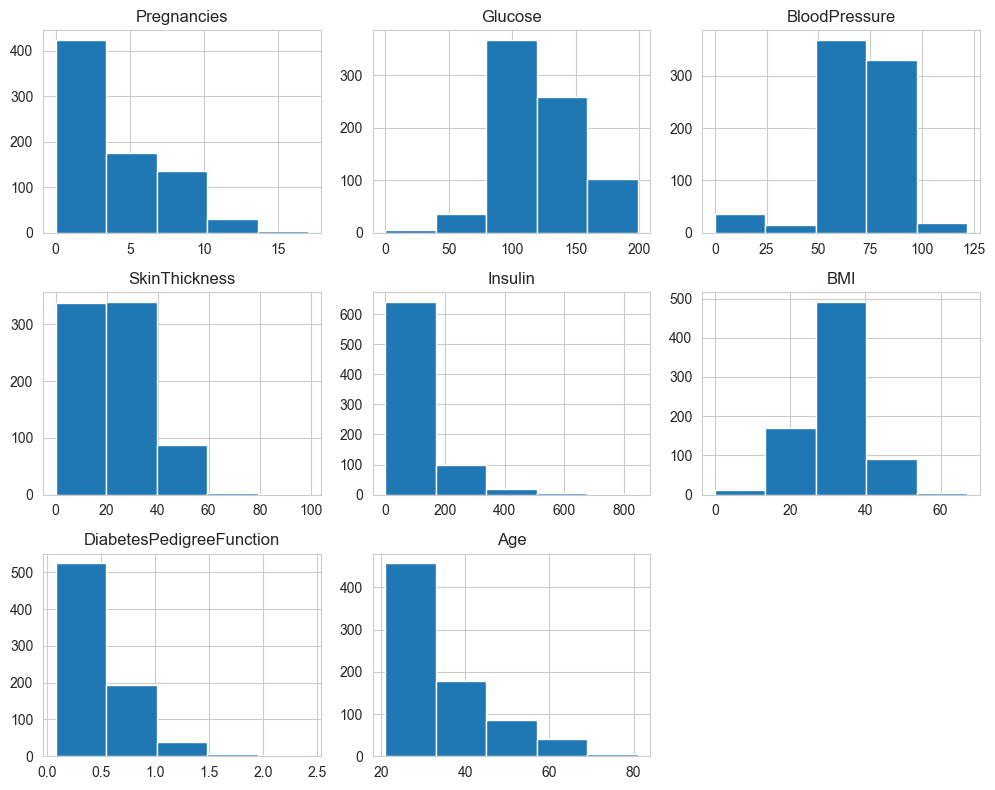

In [60]:
df_to_plot = df.iloc[:, :-1]
df_to_plot.hist(figsize=(10,8), bins= 5)
plt.tight_layout()
plt.show()

- Pregnancies: Sự phân bố cho thấy đỉnh điểm khoảng 1-2 lần mang thai, với sự giảm dần khi số lần mang thai tăng lên. Số lần mang thai trung bình là khoảng 3,85, với độ lệch chuẩn là 3,37. Tính năng này thể hiện độ lệch dương với giá trị độ lệch là 0,90.
- glucose: Hầu hết các cá nhân có mức glucose từ 100 đến 150 mg / dl. Mức glucose trung bình là khoảng 120,89 mg / dl, với độ lệch chuẩn là 31,97 mg / dl. Tính năng này thể hiện độ lệch dương với giá trị độ lệch là 0,17.
- Blood_pressure: Phần lớn các cá nhân có chỉ số huyết áp từ 60 đến 80 mm Hg. Huyết áp trung bình là khoảng 69,11 mm Hg, với độ lệch chuẩn là 19,36 mm Hg. Tính năng này thể hiện độ lệch âm, cho thấy độ lệch về phía các giá trị thấp hơn, với giá trị độ lệch là -1,84.
- skin_thickness: Sự phân bố cho thấy đỉnh khoảng 20-30 mm, với ít cá thể có độ dày da cực thấp hoặc cao. Độ dày da trung bình là khoảng 20,54 mm, với độ lệch chuẩn là 15,95 mm. Tính năng này thể hiện độ lệch dương với giá trị độ lệch là 0,11.
- insulin: Hầu hết các cá nhân có nồng độ insulin từ 0 đến 200 μU / ml. Mức insulin trung bình là khoảng 79,80 μU / ml, với độ lệch chuẩn là 115,24 μU / ml. Tính năng này thể hiện độ lệch dương với giá trị độ lệch là 2,27.

- BMI: Sự phân bố có phần bình thường, với đỉnh điểm khoảng 30 kg / m². BMI trung bình là khoảng 31,99 kg / m², với độ lệch chuẩn là 7,88 kg / m². Tính năng này thể hiện độ lệch âm, cho thấy độ nghiêng về các giá trị thấp hơn, với giá trị độ lệch là -0,43.

- Diabetes_pedigree_function: Sự phân bố cho thấy đỉnh điểm khoảng 0,3-0,4, cho thấy chức năng phả hệ bệnh tiểu đường vừa phải cho hầu hết các cá nhân. Chức năng phả hệ bệnh tiểu đường trung bình là khoảng 0,47, với độ lệch chuẩn là 0,33. Tính năng này thể hiện độ lệch dương với giá trị độ lệch là 1,92.

- Age: Sự phân bố có phần đồng đều, với đỉnh điểm vào khoảng cuối những năm 20 đến đầu những năm 30. Độ tuổi trung bình là khoảng 33,24 

Mối quan hệ giữa số lần mang thai và mắc hay không mắc bệnh tiểu đường.

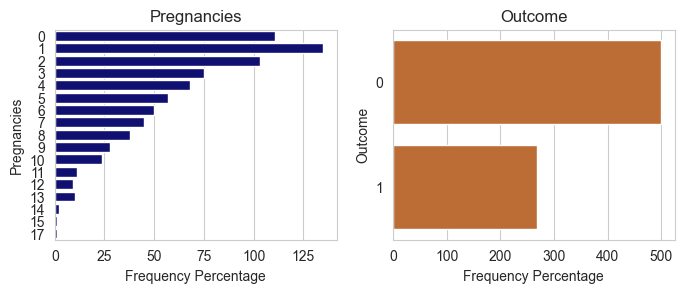

In [61]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
sns.countplot(y='Pregnancies', data=df, color='navy')
plt.title('Pregnancies')
plt.xlabel('Frequency Percentage')
plt.ylabel('Pregnancies')

plt.subplot(2, 2, 2)
sns.countplot(y='Outcome', data=df, color='chocolate')
plt.title('Outcome')
plt.xlabel('Frequency Percentage')
plt.ylabel('Outcome')

plt.show()

- The percentage distribution of pregnancies is as follows:
1: 17.6%;
0: 14.5%;
2: 13.4%;
3: 9.8%;
4: 8.9%;
5: 7.4%;
6: 6.5%;
7: 5.9%;
8: 4.9%;
9: 3.6%;
10: 3.1%;
11: 1.4%;
12: 1.2%;
13: 1.3%;
14: 0.3%;
15: 0.1%;
17: 0.1%.
- OutCome: Sự phân bố cho thấy sự hiện diện hay vắng mặt của một tình trạng nhất định (ví dụ: bệnh tiểu đường). Phần lớn các cá nhân có kết quả là 0, chiếm 65,1% tổng số, trong khi ít cá nhân có kết quả là 1, chiếm 34,9%.

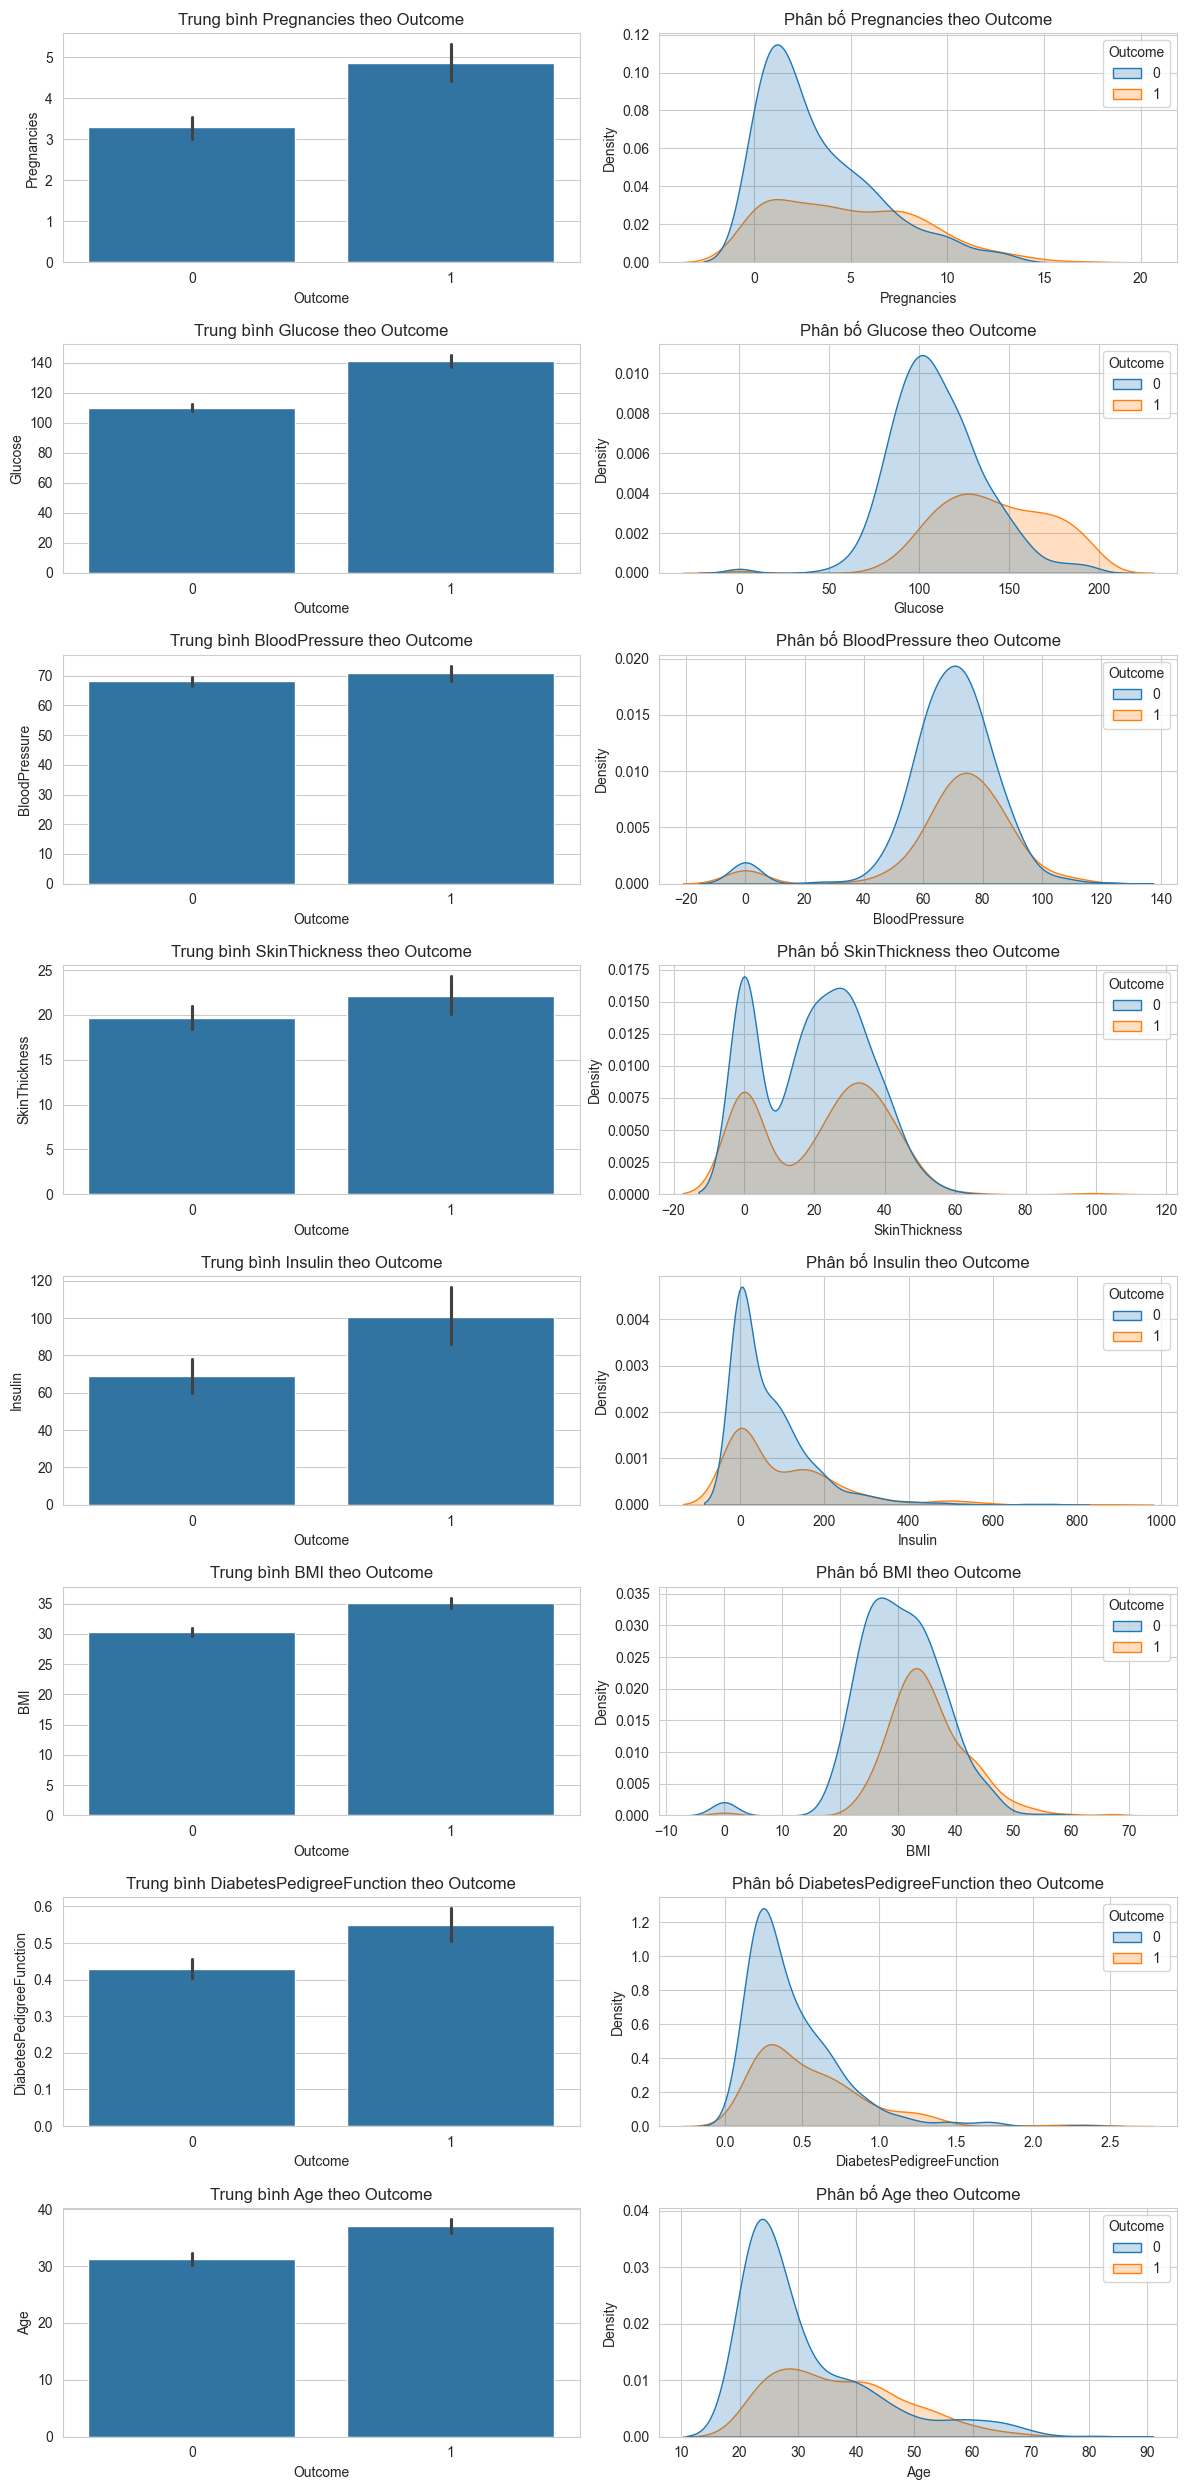

In [62]:
# sử dụng biểu đồ cột và biểu đồ hạt nhân (KDE)cho thấy Pregnancies trong từng nhóm Outcome.
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Tạo lưới biểu đồ
fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 25))
# axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    # Biểu đồ cột
    sns.barplot(x='Outcome', y=col, data=df, ax=axes[i, 0])
    axes[i, 0].set_title(f'Trung bình {col} theo Outcome')

    # Biểu đồ KDE
    sns.kdeplot(data=df, x=col, hue='Outcome', fill=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Phân bố {col} theo Outcome')

plt.tight_layout()
plt.show()

- Pregnancies: Phân bố cho thấy phụ nữ mắc bệnh tiểu đường có xu hướng mang thai trung bình nhiều hơn.
- Glucose: Phụ nữ mắc bệnh tiểu đường có nồng độ glucose cao hơn, với sự thay đổi đáng chú ý trong phân phối theo hướng có giá trị cao hơn.
- Blood Pressure: Cả hai loại được chuẩn đoán mắc bệnh tiểu đường mà không mắc bệnh tiểu đường đều có sự phân bố chồng chéo lên nhau, cho thấy không có sự khác biệt hạn chế đối với tính năng này.
- Skin Thickness: Sự phân bố độ dày da cho cả hai loại khá chặt chẽ.Có sự phân biệt rõ ràng phụ nữ mắc bệnh tiểu đường sẽ có da dày hơn so với phụ nữ không bị bệnh tiểu đường. 
- Insulin: Phụ nữ mắc bệnh tiểu đường có xu hướng có nồng độ insulin cao hơn. Sự phân bố cho phụ nữ mắc bệnh tiểu đường đạt đỉnh với giá trị cao hơn so với phụ nữ không mắc bệnh tiểu đường.
- BMI (BMI): Phụ nữ mắc bệnh tiểu đường có chỉ số BMI trung bình cao hơn. Sự phân bố cho thấy phụ nữ mắc bệnh tiểu đường có xu hướng có chỉ số BMI cao hơn.
- Diabetes Pedigree Function: Phụ nữ mắc bệnh tiểu đường có chức năng phả hệ bệnh tiểu đường cao hơn một chút. Sự phân bố cho thấy một sự thay đổi nhỏ đối với các giá trị cao hơn cho phụ nữ mắc bệnh tiểu đường.
- Age: Phụ nữ mắc bệnh tiểu đường thường lớn tuổi hơn phụ nữ không mắc bệnh tiểu đường. Sự phân bố cho thấy một sự thay đổi đáng chú ý về tuổi tác, với phụ nữ mắc bệnh tiểu đường có tuổi trung bình cao hơn.

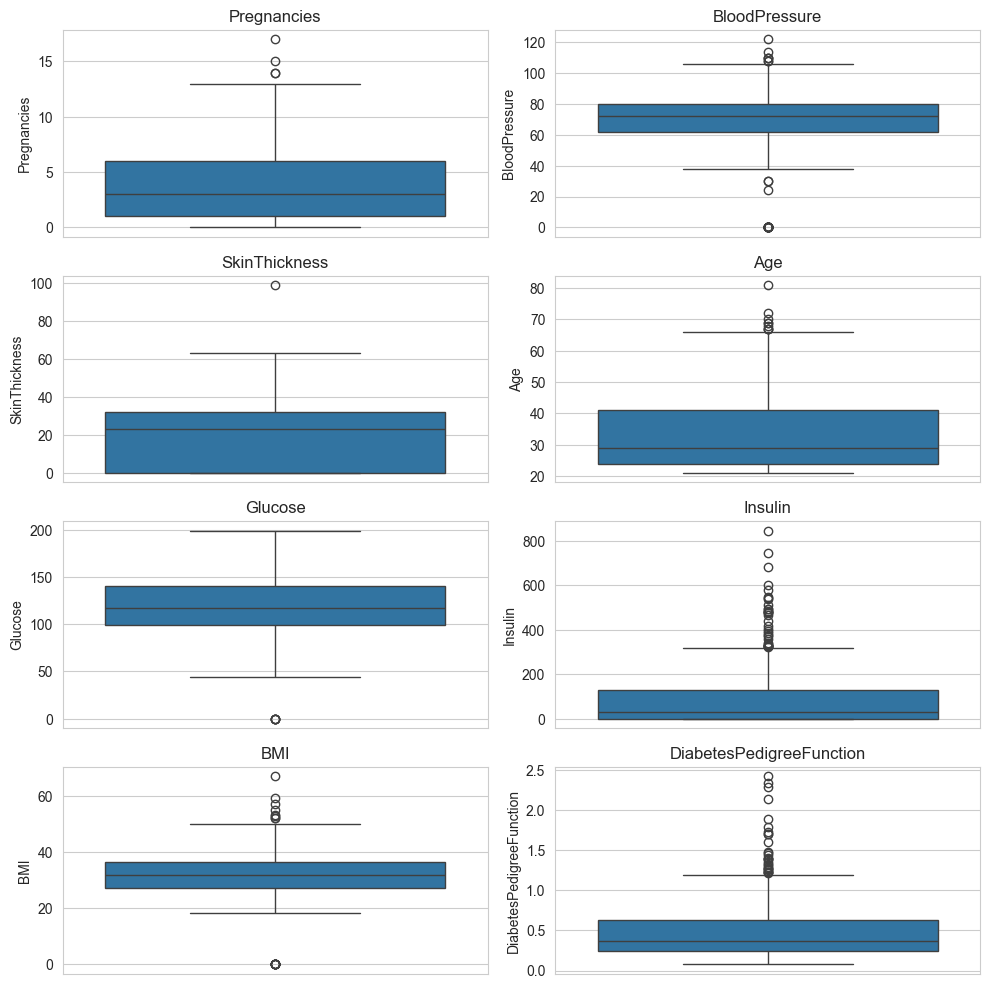

In [63]:
columns_to_plot = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
# Tạo một lưới các subplot
fig, axes = plt.subplots(4, 2, figsize=(10, 10))

# Vẽ biểu đồ cho từng cột
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col_pos = i % 2
    sns.boxplot(y=column, data=df, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(column)

plt.tight_layout()
plt.show()

1. Pregnancies (Số lần mang thai):

- Phân bố: Dữ liệu tập trung chủ yếu ở khoảng từ 2-6 lần mang thai.
- Giá trị ngoại lệ: Có một số trường hợp có số lần mang thai cao hơn đáng kể so với phần còn lại. Điều này có thể là do một số yếu tố đặc biệt như đa thai hoặc các vấn đề sức khỏe.
2. Blood Pressure (Huyết áp):

- Phân bố: Phần lớn dữ liệu tập trung ở khoảng huyết áp bình thường(60-80).
- Giá trị ngoại lệ: Có một số trường hợp có huyết áp cao bất thường. Điều này có thể liên quan đến các bệnh lý về tim mạch hoặc các yếu tố nguy cơ khác.
3. Skin Thickness (Độ dày da):

- Phân bố: Dữ liệu có sự phân tán khá lớn, cho thấy độ dày da của các cá thể trong nhóm nghiên cứu rất khác nhau(0-37).
- Giá trị ngoại lệ: Có một số trường hợp có độ dày da lớn bất thường. Điều này có thể liên quan đến các yếu tố như béo phì, bệnh lý da hoặc các đặc điểm sinh lý khác.
4. Age (Tuổi):

- Phân bố: Dữ liệu phân bố tương đối đồng đều trong một khoảng tuổi nhất định(25-41).
- Giá trị ngoại lệ: Có một số trường hợp có tuổi cao hơn so với phần còn lại. Điều này có thể là do nhóm nghiên cứu bao gồm cả người trẻ và người lớn tuổi.
5. Glucose: 
- phân bố: dữ liệu phân bố ổn định trong khoảng(100 - 148).
- Giá trị ngoại lệ: có một số trường hợp có lượng đường trong máu cao hơn so với phần còn lại. Điều này có thể do chế độ ăn nhiều đường và carbohydrate, Thiếu insulin.
6. Insulin: 
- phân bố : dữ liệu phân bố khá lớn, cho thấy lượng Insulin của từng trường hợp trong nhóm rất khác nhau(0 - 168) 
- Giá trị ngoại lệ: có một số trường hợp có lượng Insulin cao hơn với phần còn lại. Điều này có thể do Thừa cân hoặc béo phì, Yếu tố di truyền.
7. BMI: 
- phâ bố: dữ liệu phân bố chủ yếu trong khoảng(23 - 37).
- Giá trị ngoại lệ: có một số trường hợp có lượng BMI cao hơn với phần còn lại. Điều này có thể do các biến chứng như bệnh tim mạch, cao huyết áp, và rối loạn mỡ máu.
8. DiabetesPedigreeFunction:
- phân bố: dữ liệu không đồng đều chủ yếu(0.2 - 0.7) cho thấy di truyền bệnh ở các trường hợp trong nhóm khác nhau.
- Giá trị ngoại lệ: có một số trường hợp có lượng DiabetesPedigreeFunction cao hơn với phần còn lại. Điều này có thể do có lịch sử gia đình mắc bệnh tiểu đường (ví dụ: cha mẹ, anh chị em hoặc họ hàng gần mắc tiểu đường)

In [64]:
import jinja2
from scipy import stats
numeric_df = df.select_dtypes(include='number')
z_scores = stats.zscore(numeric_df)
outliers = (np.abs(z_scores) > 3)
outlier_counts = pd.DataFrame(outliers.sum(), columns=['Outlier Count'])
global_style = {'font-color': 'red', 'background-color': 'green'}
styled_outlier_counts = outlier_counts.style.set_properties(**global_style)
styled_outlier_counts

,Outlier Count
Pregnancies,4
Glucose,5
BloodPressure,35
SkinThickness,1
Insulin,18
BMI,14
DiabetesPedigreeFunction,11
Age,5
Outcome,0


- Pregnancies: Có 4 ngoại lệ được phát hiện trong tính năng 'mang thai'.
- glucose: Có 5 ngoại lệ được phát hiện trong tính năng 'glucose'.
- blood_pressure: Một số lượng ngoại lệ tương đối cao, tổng cộng 35, đã được phát hiện trong tính năng 'blood_pressure'.
- skin_thickness: Có 1 ngoại lệ được phát hiện trong tính năng 'skin_thickness'.
- insulin: Có 18 ngoại lệ được phát hiện trong tính năng 'insulin'.
- BMI: Có 14 ngoại lệ được phát hiện trong tính năng 'bmi'.
- diabetes_pedigree_function: Có 11 ngoại lệ được phát hiện trong tính năng 'diabetes_pedigree_function'.
- Age: Có 5 ngoại lệ được phát hiện trong tính năng 'tuổi'.
- Outcome: Không có ngoại lệ nào được phát hiện trong tính năng 'kết quả'.

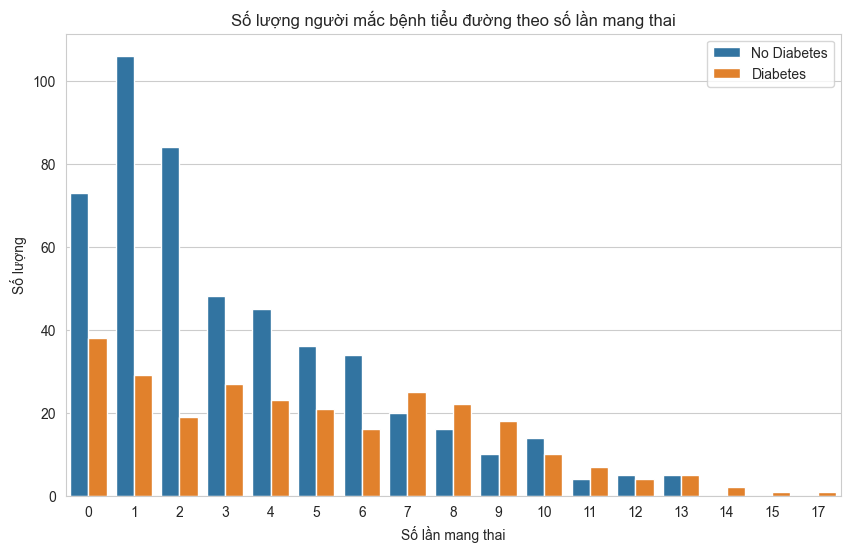

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pregnancies', hue='Outcome', data=df)
plt.title('Số lượng người mắc bệnh tiểu đường theo số lần mang thai')
plt.xlabel('Số lần mang thai')
plt.ylabel('Số lượng')
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

- Trục X: Số lần mang thai.
- Trục Y: Số lượng cá nhân.
- Thanh: Màu xanh đại diện cho những người không mắc bệnh tiểu đường và màu cam đại diện cho những người mắc bệnh tiểu đường.
-> Quan sát: Những người không mang thai chủ yếu không mắc bệnh tiểu đường. Khi số lần mang thai tăng lên, tỷ lệ người mắc bệnh tiểu đường trở nên đáng chú ý hơn, đặc biệt là đối với những người mang thai từ 6 lần trở lên.

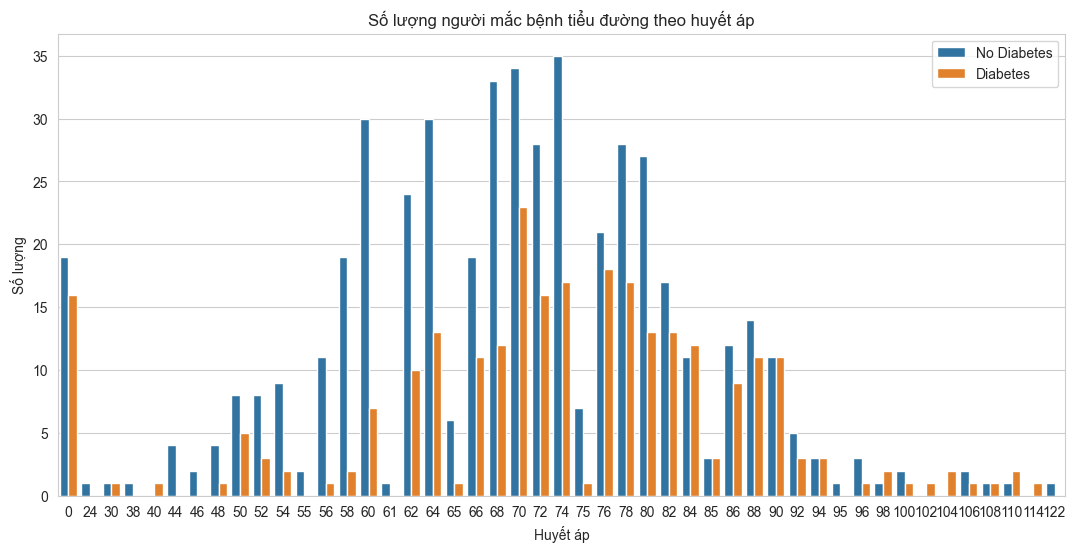

In [66]:
plt.figure(figsize=(13, 6))
sns.countplot(x='BloodPressure', hue='Outcome', data=df)
plt.title('Số lượng người mắc bệnh tiểu đường theo huyết áp')
plt.xlabel('Huyết áp')
plt.ylabel('Số lượng')
plt.legend(['No Diabetes', 'Diabetes'])
plt.show()

- Trục X: Giá trị huyết áp.
- Trục Y: Số lượng cá nhân.
- Thanh: Màu xanh đại diện cho những người không mắc bệnh tiểu đường và màu cam đại diện cho những người mắc bệnh tiểu đường.
- Quan sát: Có một loạt các giá trị huyết áp. Số lượng người mắc bệnh tiểu đường cao hơn xuất hiện ở các giá trị huyết áp cao hơn (đặc biệt là khoảng 70-90), mặc dù những người không mắc bệnh tiểu đường vẫn chiếm ưu thế trong hầu hết các phạm vi huyết áp.

Sử dụng biểu đồ tripplot() để quan sát các giá trị phân tán liên tục của các tính năng với Outcome.

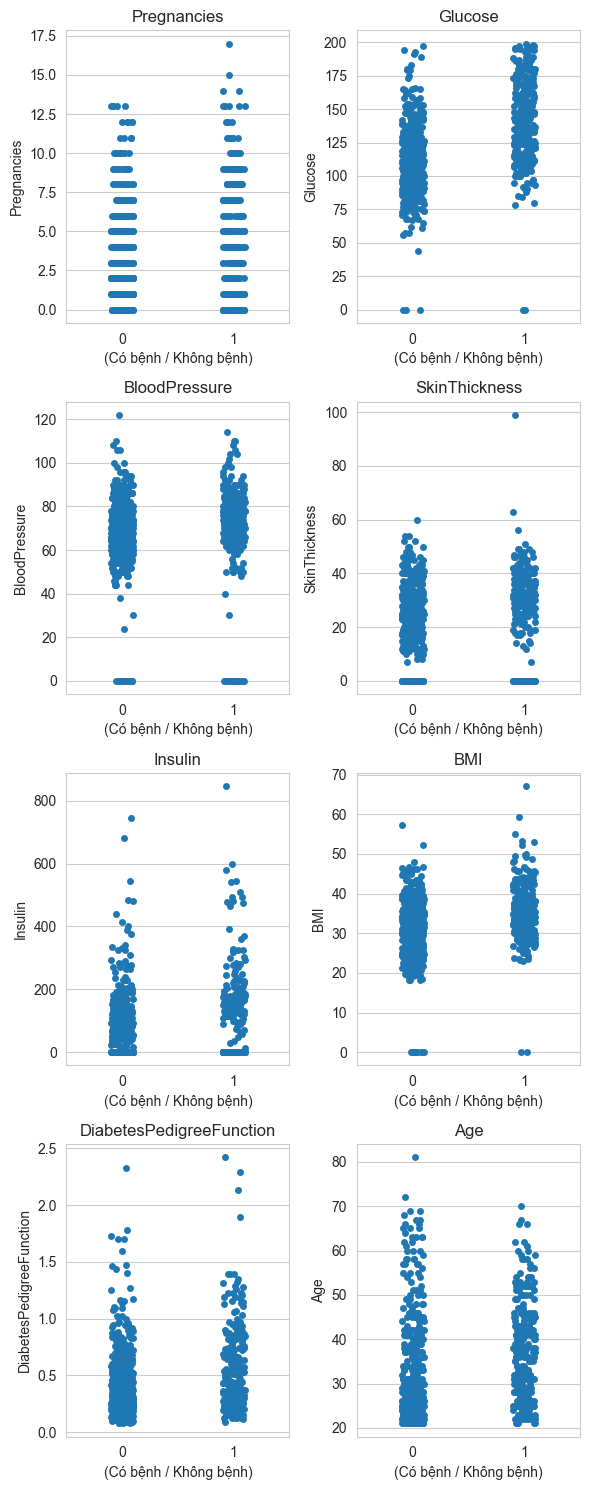

In [67]:
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                'BMI', 'DiabetesPedigreeFunction', 'Age']

# Tạo các subplot để hiển thị biểu đồ stripplot
fig, axes = plt.subplots(4, 2, figsize=(6, 15))

# Lặp qua từng cột số và tạo biểu đồ stripplot
for i, col in enumerate(numeric_cols):
    row = i // 2
    col_pos = i % 2
    sns.stripplot(x='Outcome', y=col, data=df, ax=axes[row, col_pos])
    ax=axes[row, col_pos].set_title(f'{col}')
    ax=axes[row, col_pos].set_xlabel('(Có bệnh / Không bệnh)')  # Nhãn trục X rõ ràng hơn
    ax=axes[row, col_pos].set_ylabel(f'{col}')

# Điều chỉnh khoảng cách giữa các subplot
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

- Mang thai (7-10): Những người mang thai trong phạm vi này có khả năng mắc bệnh tiểu đường cao hơn. Phạm vi này không đảm bảo bệnh tiểu đường nhưng cho thấy nguy cơ cao hơn.

- Glucose (> 125): Nồng độ glucose cao hơn 125 cho thấy khả năng mắc bệnh tiểu đường cao.

- Huyết áp (60 - 100): Giá trị huyết áp trong phạm vi này có liên quan đến nhiều trường hợp tiểu đường khi kết hợp với bất kỳ đặc điểm nào.

- BMI và Độ dày da (20 - 50): Khi cả BMI và SkinThickness đều giảm trong phạm vi này, có khả năng cao mắc bệnh tiểu đường.

- Insulin (0 - 300): Giá trị insulin từ 0 đến 300 làm tăng nguy cơ mắc bệnh tiểu đường. Giá trị trên 400 cho thấy khả năng mắc bệnh tiểu đường cao.

- Tuổi (20-50) và Bệnh tiểu đườngPhả hệChức năng (0 - 1,5): Những người trong độ tuổi từ 20 đến 50 mắc bệnh tiểu đườngCác giá trị chức năng từ 0 đến 1,5 có khả năng mắc bệnh tiểu đường.

Biểu đồ pairplot() giúp hiển thị các mối quan hệ cặp đôi giữa các thuộc tính của dữ liệu và cũng hiển thị phân phối của từng thuộc tính.

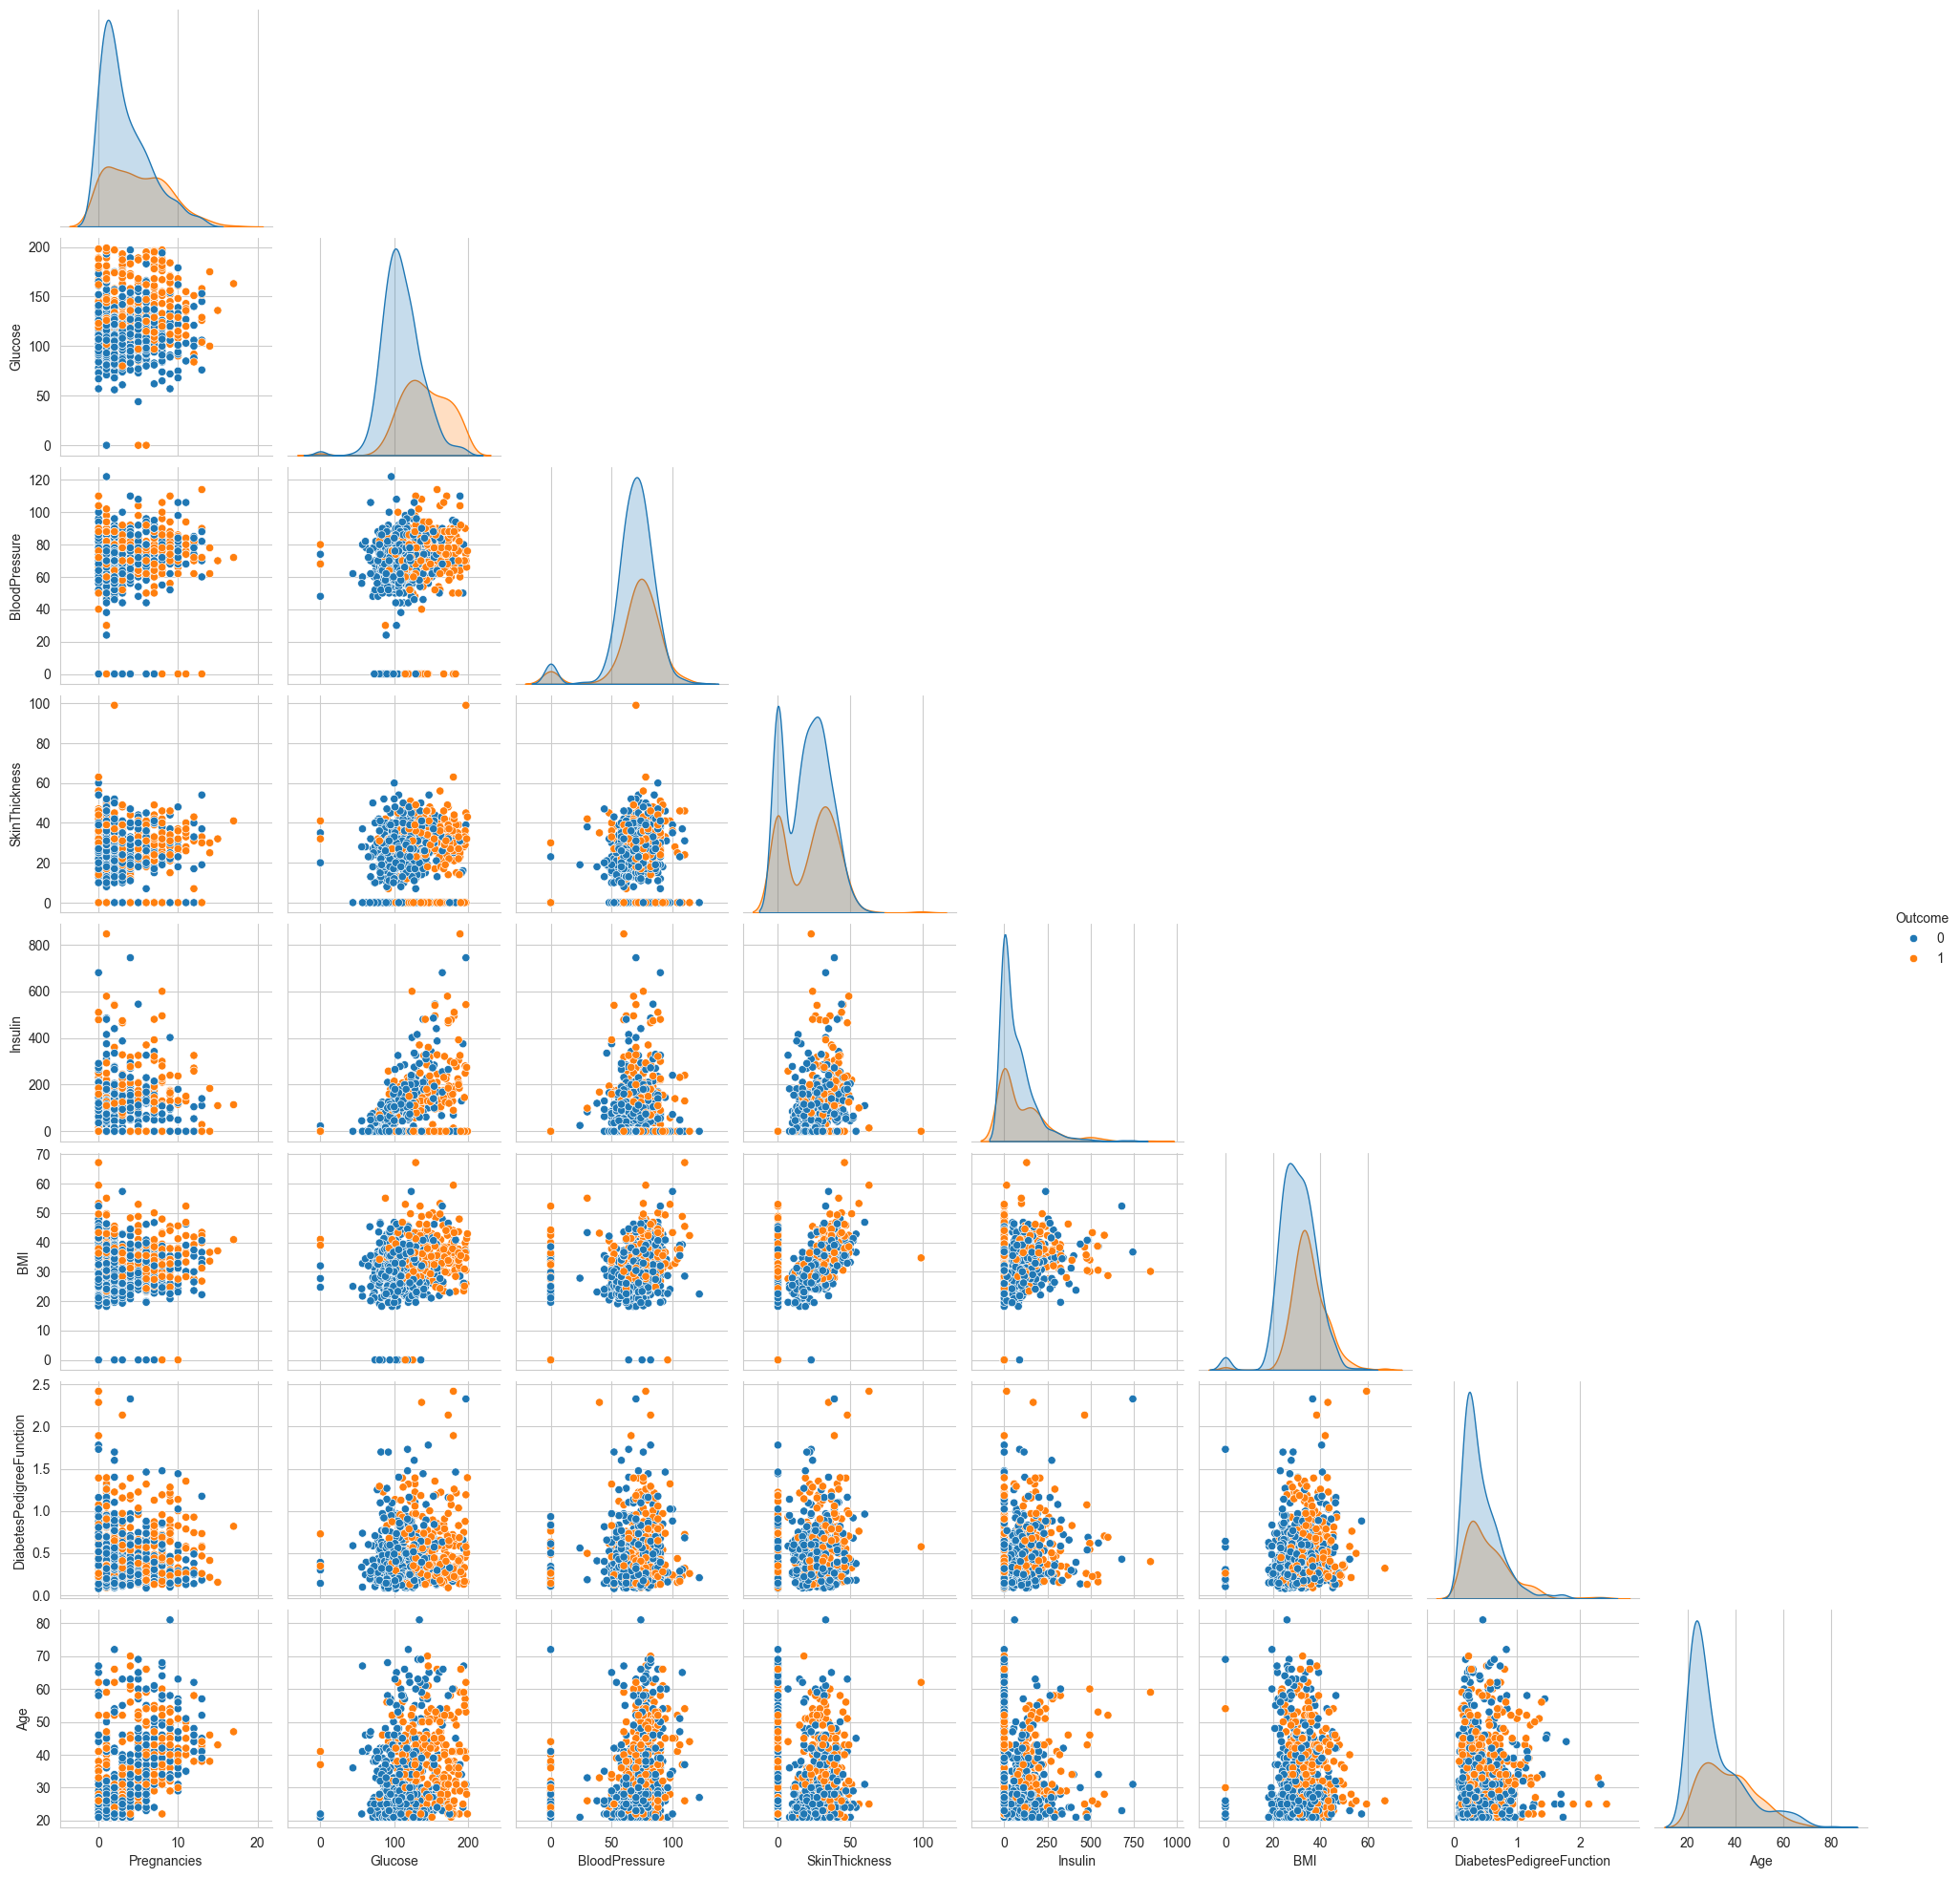

In [68]:
View_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
sns.pairplot(df[View_cols], hue='Outcome', diag_kind= 'kde', corner= True)
plt.show()

- Pregnancies: Có sự phân bố lệch phải, nghĩa là phần lớn các giá trị của số lần mang thai nằm trong khoảng thấp (từ 0 đến 5). Một số trường hợp ngoại lệ có giá trị rất cao, nhưng không phổ biến.
- Glucose: Phân phối của Glucose có dạng gần giống phân phối chuẩn, với đỉnh tập trung vào mức glucose khoảng 100-150. Tuy nhiên, một số ngoại lệ có mức glucose rất cao.
- BloodPressure: Phân phối của huyết áp có xu hướng tập trung ở mức 70-80, và có một số ngoại lệ với giá trị rất cao hoặc rất thấp.
- SkinThickness: Phân phối có sự tập trung ở mức thấp (dưới 50), nhưng có một lượng lớn các giá trị ngoại lệ với độ dày da cao hơn.
- Insulin: Phân bố của Insulin lệch phải mạnh, phần lớn người có mức insulin dưới 200, với nhiều ngoại lệ có mức insulin cao hơn.
- BMI: Phân phối của chỉ số BMI gần như phân phối chuẩn, với giá trị tập trung xung quanh mức 30-35.
- DiabetesPedigreeFunction: Phân phối có xu hướng lệch phải nhẹ, phần lớn các giá trị tập trung dưới 1, cho thấy khả năng di truyền bệnh tiểu đường thấp với một số trường hợp ngoại lệ có giá trị cao.
- Age: Phân phối tuổi lệch phải, với phần lớn các giá trị dưới 50. Điều này cho thấy nhóm người trẻ chiếm phần lớn dữ liệu, nhưng cũng có những người lớn tuổi hơn tham gia.

- Pregnancies và Outcome: Nhìn vào mối quan hệ giữa số lần mang thai và Outcome, những người có nhiều lần mang thai hơn dường như có xu hướng bị tiểu đường nhiều hơn. Số lần mang thai cao có thể là một yếu tố liên quan đến kết quả tiểu đường.
- Glucose và Outcome: Mối quan hệ giữa mức glucose và Outcome rất rõ ràng. Những người có mức glucose cao thường có nguy cơ bị tiểu đường cao hơn. Đây là một trong những chỉ số quan trọng trong việc phát hiện bệnh tiểu đường.
- BloodPressure và Outcome: Huyết áp không có mối quan hệ rõ ràng với Outcome, mặc dù có một chút xu hướng những người có huyết áp cao hơn dễ bị tiểu đường hơn.
- SkinThickness và Outcome: Mối quan hệ giữa độ dày da và Outcome không rõ ràng, nhưng có một số trường hợp có độ dày da cao có liên quan đến tiểu đường.
- Insulin và Outcome: Mối quan hệ giữa insulin và Outcome khá rõ ràng, những người có mức insulin cao thường có nguy cơ tiểu đường cao hơn. Điều này cho thấy insulin đóng vai trò quan trọng trong bệnh tiểu đường.
- BMI và Outcome: Những người có BMI cao hơn (thường từ 30 trở lên) có nguy cơ bị tiểu đường cao hơn. Mối quan hệ giữa BMI và Outcome khá mạnh.
- DiabetesPedigreeFunction và Outcome: Những người có khả năng di truyền bệnh tiểu đường cao hơn (giá trị cao hơn của DiabetesPedigreeFunction) thường có nguy cơ tiểu đường cao hơn.
- Age và Outcome: Người lớn tuổi có xu hướng bị tiểu đường nhiều hơn, đặc biệt ở những người trên 50 tuổi.

trực quan hóa phân phối dữ liệu

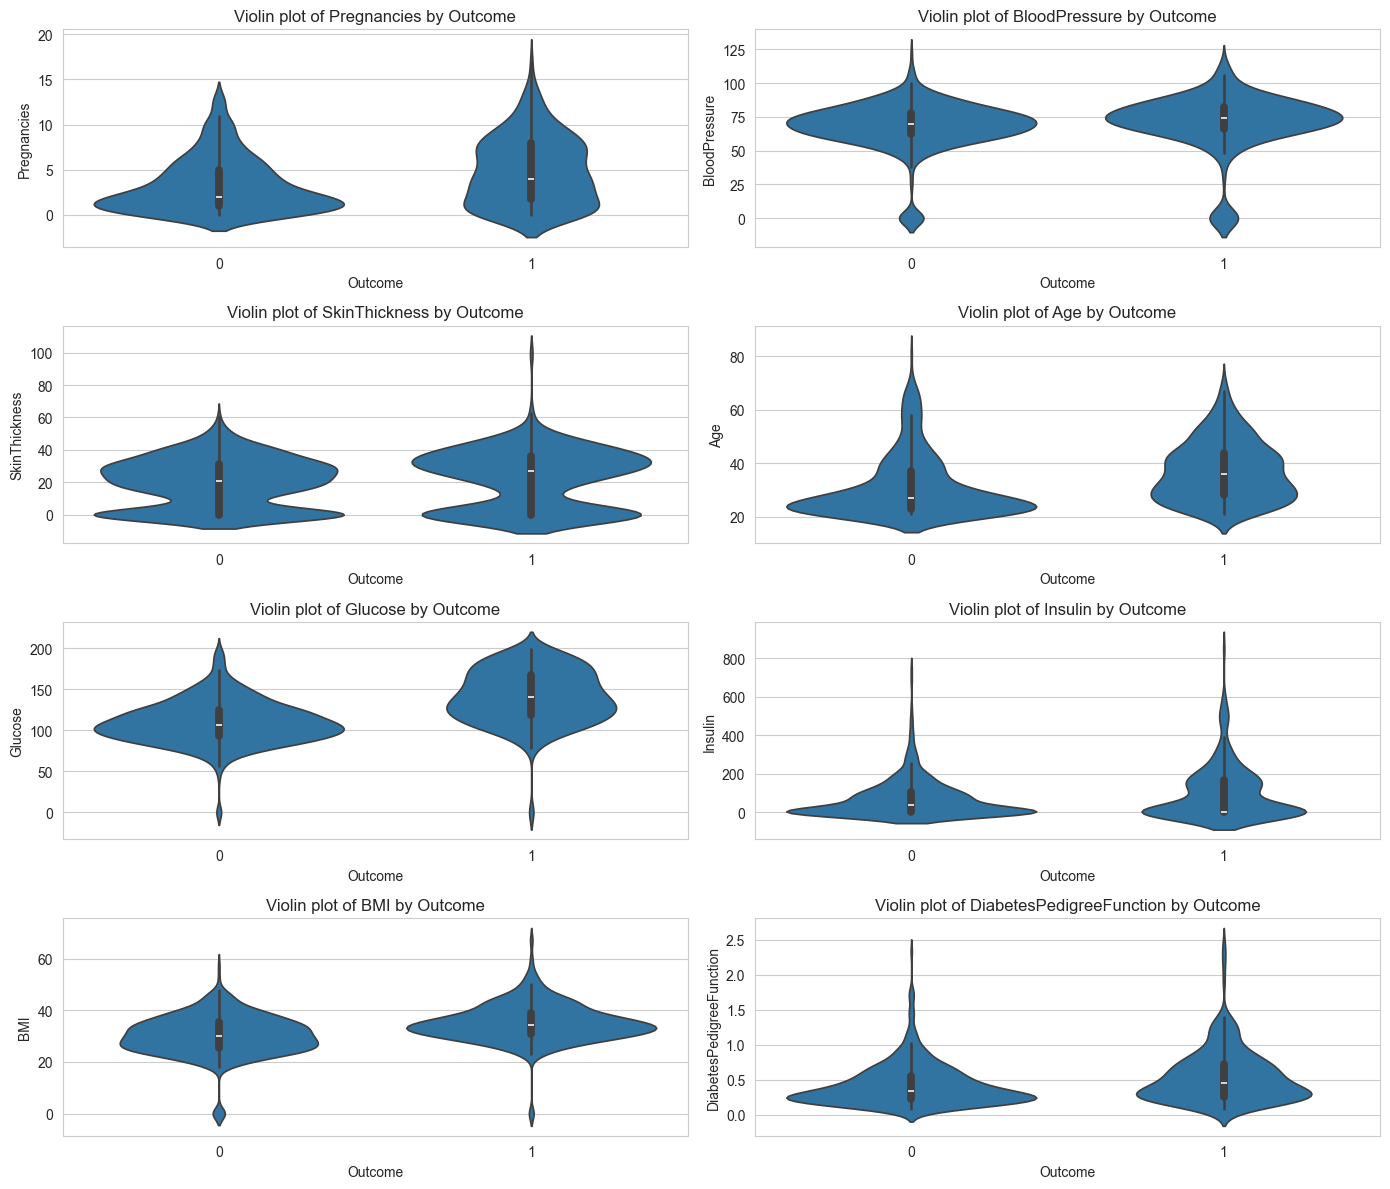

In [69]:
attributes = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Age', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
# Tạo lưới biểu đồ với 2 hàng và 2 cột
fig, axes = plt.subplots(4, 2, figsize=(14, 12))

for i, attribute in enumerate(attributes):
    row = i // 2  # Chia hàng dựa trên chỉ số
    col = i % 2   # Chia cột dựa trên chỉ số
    sns.violinplot(x='Outcome', y=attribute, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Violin plot of {attribute} by Outcome')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

- phụ nữ mang thai trong khoảng 0 - 5 lần có khả năng không mắc bệnh tiểu đường cao hơn so với phụ nữ bị bệnh tiểu đường. Tuy nhiên ở ngưỡng phụ nữ bị mắc bệnh tiểu đường có lần mang thai rộng hơn lên tới 10 lần.
- người có huyết áp trong khoảng 50 - 90 mm Hg ở người mắc bệnh và không mắc bệnh tiểu đường không chênh nhau lắm và sự khác biệt chưa rõ ràng. người mắc bệnh có mức huyết áp rộng hơn một chút cho thấy có một số người còn có huyết áp cao hơn.
- Ở cả hai nhóm, độ dày da tập trung quanh mức 20-40, Tuy nhiên, nhóm Outcome = 1 có một số cá nhân có giá trị độ dày da lớn hơn 50, trong khi nhóm Outcome = 0 có sự phân tán ít hơn và dải giá trị hẹp hơn.
- Nhóm Outcome = 1 có xu hướng tuổi cao hơn, phân phối tuổi trải dài đến gần 80 tuổi. Trong khi đó, nhóm Outcome = 0 chủ yếu tập trung ở độ tuổi dưới 50. Nhóm Outcome = 1 có độ dày lớn hơn trong khoảng tuổi 40-60, có nghĩa là người lớn tuổi có khả năng bị bệnh cao hơn.
- người có lượng đường trong máu trong khoảng(80 - 175) mm Hg, ở người mắc bệnh và không mắc bệnh tiểu đường có sự khác biệt rõ ràng. người mắc bệnh tiểu đường phân bố rộng hơn một chút cho thấy có 1 số người có lượng đường trong máu cao hơn tới 175mm Hg.
- người có nồng độ Insulin trong máu của 2 nhóm đều phân bố không rõ ràng tập trung trong khoảng(0 - 215). tuy nhiên nhóm 1 có mức cao hơn 250, người mắc bệnh tiểu đường phân bố rộng hơn một chút cho thấy có 1 số người có nống độ Insulin cao hơn.
- người có chỉ số BMI của 2 nhóm đều phân bố trong khoảng(20-40), nhưng tuy nhiên ở nhóm nhóm người mắc bệnh phân bố rộng hơn một chút do có 1 số người có chỉ số BMI cao hơn các mấu khác.
- mức độ di truyền bệnh ở 2 nhóm có sự tập trung trong khoảng(0 - 1), ngoài ra người bị mắc bệnh có khả năng bị ảnh hưởng do di truyền cao hơn tới 1.5.

- điều này cho thấy 2 thuộc tính về số lần mang thai và huyết áp là yếu tố quan trọng đến người có hay không mắc bệnh tiểu đường.
- Huyết áp và độ dày da cũng có sự khác biệt, tuy nhiên mức độ phân biệt không rõ ràng bằng.

Correlation Analysis trực quan hóa ma trận tương quan giữa các biến số trong dữ liệu. Đây là một công cụ hữu ích để kiểm tra mối tương quan tuyến tính giữa các cặp thuộc tính và dễ dàng nhận diện các cặp có mối quan hệ mạnh (tích cực hoặc tiêu cực).

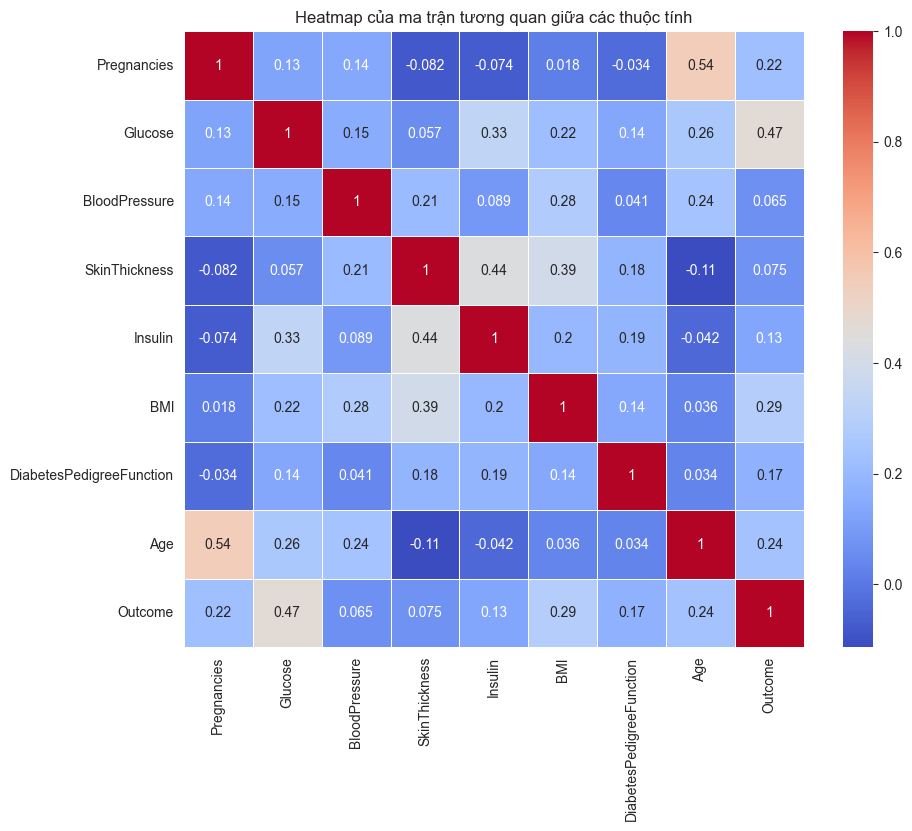

In [70]:
# Tính ma trận tương quan
corr_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap của ma trận tương quan giữa các thuộc tính')
plt.show()

1) các mối tương quan khác nhau giữa từng cặp thuộc tính:
- Pregnancies (Số lần mang thai): Có tương quan trung bình với Age (0.54), cho thấy người mang thai nhiều lần có xu hướng lớn tuổi.Có tương quan nhẹ với Outcome (0.22), cho thấy số lần mang thai có thể ảnh hưởng đến khả năng mắc bệnh.
Tương quan rất thấp hoặc âm với các thuộc tính khác.
- Glucose (Lượng đường trong máu): Có tương quan mạnh với Insulin (0.33) và BMI (0.22), cho thấy khi lượng đường trong máu cao, mức insulin và chỉ số BMI cũng có xu hướng tăng. Có tương quan khá cao với Outcome (0.47), cho thấy lượng đường trong máu là một yếu tố quan trọng ảnh hưởng đến khả năng mắc bệnh.
- BloodPressure (Huyết áp): Có tương quan trung bình với BMI (0.28) và SkinThickness (0.21). Tương quan rất thấp với Outcome (0.065), cho thấy huyết áp không phải là một yếu tố quan trọng ảnh hưởng đến kết quả.
- SkinThickness (Độ dày da): Có tương quan mạnh với Insulin (0.44), nghĩa là độ dày da và mức insulin có mối quan hệ chặt chẽ. Có tương quan rất yếu với Outcome (0.075), do đó có thể không phải là yếu tố quan trọng.
- Insulin: Có tương quan trung bình với Glucose (0.33), SkinThickness (0.44), và nhẹ với BMI (0.2). Tương quan nhẹ với Outcome (0.13), có thể có chút ảnh hưởng nhưng không đáng kể.
- BMI (Chỉ số khối cơ thể): Có tương quan trung bình với BloodPressure (0.28) và SkinThickness (0.39). Có tương quan vừa với Outcome (0.29), cho thấy chỉ số BMI có liên quan đến khả năng mắc bệnh.
- DiabetesPedigreeFunction (Chỉ số di truyền): Có tương quan rất yếu với các thuộc tính khác và chỉ số Outcome (0.17), cho thấy di truyền có thể ảnh hưởng nhưng không mạnh.
- Age (Tuổi): Tương quan mạnh với Pregnancies (0.54), nghĩa là người lớn tuổi thường có số lần mang thai nhiều hơn. Có tương quan nhẹ với Outcome (0.24), cho thấy tuổi tác cũng có chút ảnh hưởng đến khả năng mắc bệnh.
+ ta cần giữ lại các thuộc tính Pregnancies, Glucose, BMI, Age.

Model Development & Evaluation

Data Normalization

In [71]:
# Select the features to be scaled
scaled_features = df.columns

# Create a copy of the DataFrame to preserve the original data
scaled_df = df.copy()
# Scale the selected features
scaler = StandardScaler()
scaled_df[scaled_features] = scaler.fit_transform(scaled_df[scaled_features])

# Extract the target variable
y = df["Outcome"].values
# Select only the scaled features
scaled_summary = scaled_df[scaled_features].describe().T

# Apply a gradient background to each column using the style.background_gradient() method
styled_scaled_summary = scaled_summary.style.background_gradient(axis=0, cmap='Greens')

# Display the styled summary
styled_scaled_summary

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000000,-0.000000,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.000000,-0.000000,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.000000,0.000000,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.000000,0.000000,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.000000,-0.000000,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.000000,0.000000,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.000000,0.000000,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.000000,0.000000,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Outcome,768.000000,0.000000,1.000652,-0.732120,-0.732120,-0.732120,1.365896,1.365896


Model Preparing

In [72]:
# Split the data into features (X) and target variable (y)
X = scaled_df.drop(["Outcome"], axis=1)  # Drop "outcome"
y = df['Outcome'] # dependent

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

áp dụng kỹ thuật SMOTE 

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [75]:
# Kiểm tra số lượng mẫu trong mỗi nhóm
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_resampled.value_counts())

Before SMOTE: Outcome
0    401
1    213
Name: count, dtype: int64
After SMOTE: Outcome
0    401
1    401
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_15056\122918086.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Datasets', y='Number of instances', data=shapes_df, palette='viridis', ax=axs[0])


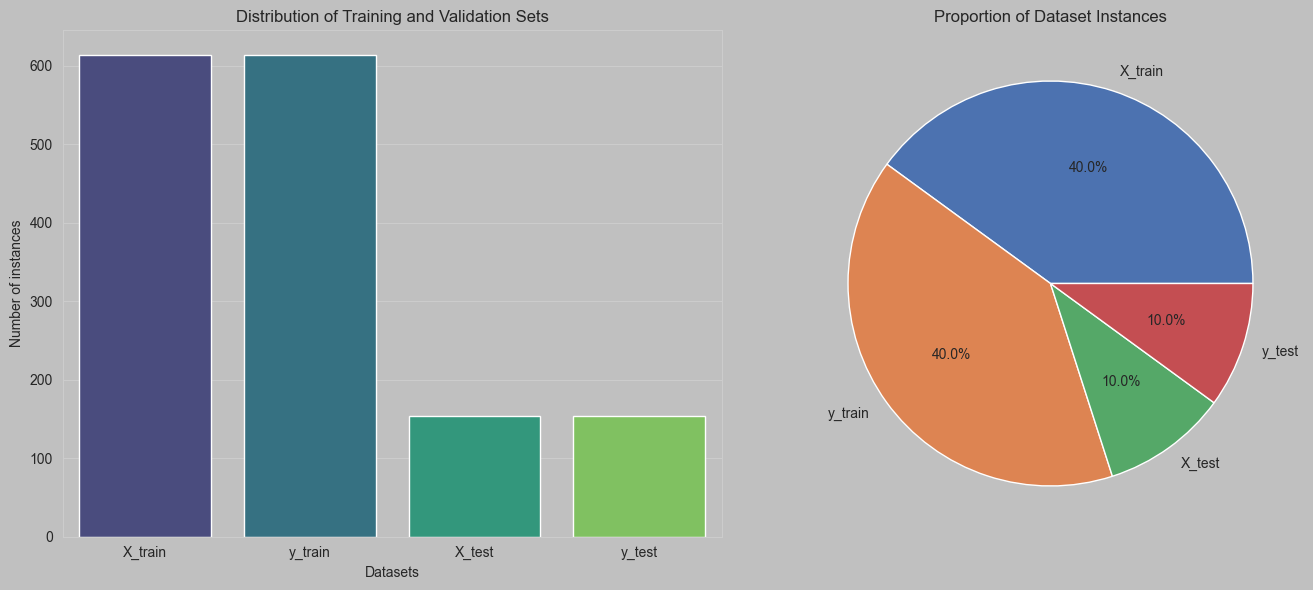

In [76]:
# Create a dictionary to store the shapes of datasets
shapes = {
    'X_train': X_train.shape[0],
    'y_train': y_train.shape[0],
    'X_test': X_test.shape[0],
    'y_test': y_test.shape[0]
}

# Convert the dictionary into a DataFrame for easy plotting
shapes_df = pd.DataFrame(shapes.items(), columns=['Datasets', 'Number of instances'])

subplot_color='silver'

# Plot using Seaborn
fig, axs = plt.subplots(1, 2, figsize=(14, 6), facecolor=subplot_color)

# Bar plot
sns.barplot(x='Datasets', y='Number of instances', data=shapes_df, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Datasets')
axs[0].set_ylabel('Number of instances')
axs[0].set_title('Distribution of Training and Validation Sets')
axs[0].set_facecolor(subplot_color)  # Set subplot background color

# Pie plot
axs[1].pie(shapes_df['Number of instances'], labels=shapes_df['Datasets'], autopct='%1.1f%%', colors=sns.color_palette('deep'))
axs[1].set_title('Proportion of Dataset Instances')
axs[1].set_facecolor(subplot_color)  # Set subplot background color

plt.tight_layout()
plt.show()


KNeighborsClassifier

In [77]:
neighbors = np.arange(1, 37, 2) # Khởi tạo giá trị cho neighbors
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    
# Combine train and test accuracies into a single table
combined_accuracies = [{'Neighbor': f"{neighbor}", 
                        'Train Accuracy': f"{train_acc:.4f}", 
                        'Test Accuracy': f"{test_accuracies[neighbor]:.4f}"} 
                       for neighbor, train_acc in train_accuracies.items()]

# Print train and test accuracies in tabular format
for row in combined_accuracies:
    print(row)

{'Neighbor': '1', 'Train Accuracy': '1.0000', 'Test Accuracy': '0.6169'}
{'Neighbor': '3', 'Train Accuracy': '0.8616', 'Test Accuracy': '0.7013'}
{'Neighbor': '5', 'Train Accuracy': '0.8208', 'Test Accuracy': '0.6883'}
{'Neighbor': '7', 'Train Accuracy': '0.8094', 'Test Accuracy': '0.6818'}
{'Neighbor': '9', 'Train Accuracy': '0.8029', 'Test Accuracy': '0.6818'}
{'Neighbor': '11', 'Train Accuracy': '0.7932', 'Test Accuracy': '0.7143'}
{'Neighbor': '13', 'Train Accuracy': '0.7834', 'Test Accuracy': '0.7143'}
{'Neighbor': '15', 'Train Accuracy': '0.7899', 'Test Accuracy': '0.7208'}
{'Neighbor': '17', 'Train Accuracy': '0.7850', 'Test Accuracy': '0.7532'}
{'Neighbor': '19', 'Train Accuracy': '0.7834', 'Test Accuracy': '0.7597'}
{'Neighbor': '21', 'Train Accuracy': '0.7866', 'Test Accuracy': '0.7597'}
{'Neighbor': '23', 'Train Accuracy': '0.7818', 'Test Accuracy': '0.7532'}
{'Neighbor': '25', 'Train Accuracy': '0.7769', 'Test Accuracy': '0.7403'}
{'Neighbor': '27', 'Train Accuracy': '0.785

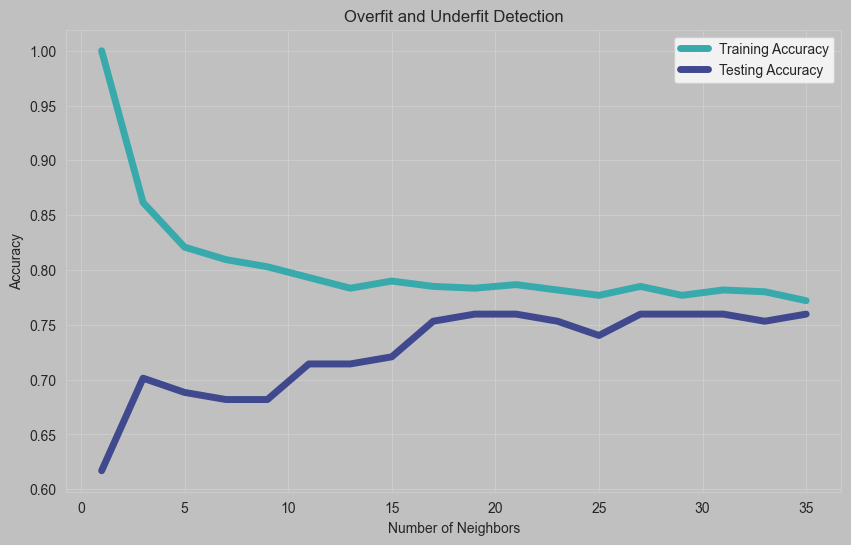

In [78]:
sns.set_style("whitegrid")  # Remove whitegrid style

# Convert dictionary values to lists
neighbors = list(train_accuracies.keys())
train_accuracy_values = list(train_accuracies.values())
test_accuracy_values = list(test_accuracies.values())

# Create a DataFrame for easy plotting
data = {'Number of Neighbors': neighbors,
        'Training Accuracy': train_accuracy_values,
        'Testing Accuracy': test_accuracy_values}
df = pd.DataFrame(data)

# Set seaborn style
sns.set_style("whitegrid")

# Define the color palette
palette = sns.color_palette("mako_r", 2)

# Plot using Seaborn
plt.figure(figsize=(10, 6), facecolor='silver')
sns.lineplot(data=df, x='Number of Neighbors', y='Training Accuracy', label='Training Accuracy', color=palette[0], linewidth=5)
sns.lineplot(data=df, x='Number of Neighbors', y='Testing Accuracy', label='Testing Accuracy', color=palette[1], linewidth=5)
plt.gca().set_facecolor('silver')  # Set subplot background color to silver
plt.title("Overfit and Underfit Detection")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- Training Accuracy(đường màu lục lam): tại k = 1, độ chính độ chính xác đào tạo là 1,0 (100%), cho thấy mô hình hoàn toàn phù hợp với dữ liệu đào tạo. Như k tăng độ chính xác đào tạo giảm. Điều này được mong đợi vì giá trị cao hơn của k Làm cho mô hình khái quát hơn và ít nhạy cảm hơn với các mẫu đào tạo riêng lẻ.
- Testing Accuracy (Blue Line): tại k = 1, độ chính xác kiểm tra thấp hơn đáng kể so với độ chính xác đào tạo, cho thấy quá mức. Mô hình quá phức tạp và phù hợp với dữ liệu đào tạo tốt nhưng không khái quát hóa thành dữ liệu không nhìn thấy. k Tăng lên, độ chính xác thử nghiệm ban đầu dao động nhưng cuối cùng bắt đầu ổn định và dần dần được cải thiện, cho thấy mô hình trở nên ít được trang bị quá mức và bắt đầu khái quát hóa tốt hơn.
- Convergence: quanh k = 27, cả độ chính xác đào tạo và kiểm tra đều hội tụ, cho thấy sự cân bằng tốt giữa độ thiên vị và phương sai. Mô hình không quá phù hợp cũng không phù hợp vào thời điểm này.
- General Trend: Xu hướng chung cho thấy giá trị thấp hơn của k dẫn đến overfitting, trong khi các giá trị cao hơn dẫn đến khái quát hóa tốt hơn đến một điểm mà cả hai độ chính xác ổn định.

In [79]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
# Print train and test accuracies with colored text
print(f'Train Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}')

Train Accuracy: 0.8208469055374593
Test Accuracy: 0.6883116883116883


Parameter Tuning KNN

In [80]:
from sklearn.model_selection import GridSearchCV  # Import GridSearchCV for hyperparameter tuning
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),  # Example values for the number of neighbors
    'weights': ['uniform', 'distance'], # Weighting strategies for neighbors
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Perform grid search using cross-validation
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, cv=10).fit(X_train, y_train)

# Get the best score, k values and hyperparameters from GridSearchCV
best_score = knn_cv.best_score_
best_params = knn_cv.best_params_
best_n_neighbors = best_params['n_neighbors']

print('--------------------------------------------------------------------------------------')
# Print the best hyperparameters, k values and accuracy
print(f"Tuned hyperparameters: {best_params}")
print('--------------------------------------------------------------------------------------')
print(f"The best value of k (n_neighbors) is: {best_n_neighbors}")
print('--------------------------------------------------------------------------------------')
print(f"Accuracy is - {best_score*100:.2f}%")
print('--------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------
Tuned hyperparameters: {'metric': 'euclidean', 'n_neighbors': np.int64(29), 'weights': 'uniform'}
--------------------------------------------------------------------------------------
The best value of k (n_neighbors) is: 29
--------------------------------------------------------------------------------------
Accuracy is - 77.20%
--------------------------------------------------------------------------------------


Confusion Matrix for KNN

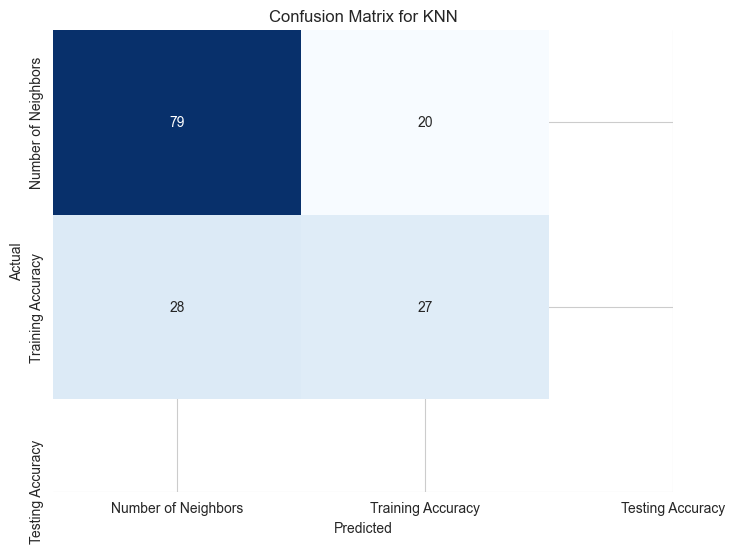

In [81]:
from sklearn.metrics import confusion_matrix
# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=df.columns, yticklabels=df.columns)

plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Hiệu suất của tập dữ liệu:
- Trong tập huấn luyện, có 79 mẫu được phân loại chính xác vào nhóm "Neighbors", nhưng có 28 mẫu thuộc "Training Accuracy" bị phân loại sai vào "Neighbors". Điều này cho thấy rằng mô hình có khả năng phân loại tốt phần lớn các mẫu trong tập huấn luyện, nhưng vẫn có một lượng nhỏ sai sót.


Hiệu suất trên tập dữ liệu kiểm tra:
- Đối với tập kiểm tra, 27 mẫu được dự đoán đúng và 20 mẫu bị dự đoán sai vào nhóm "Neighbors" (hàng trên, cột phải). Mô hình dự đoán khá chính xác nhưng vẫn còn tỷ lệ nhầm lẫn đáng kể.
- Tỷ lệ chính xác trên tập huấn luyện là khá cao, nhưng cũng cần lưu ý rằng số lượng nhầm lẫn không phải là nhỏ, đặc biệt là đối với tập kiểm tra.

Best Model Result

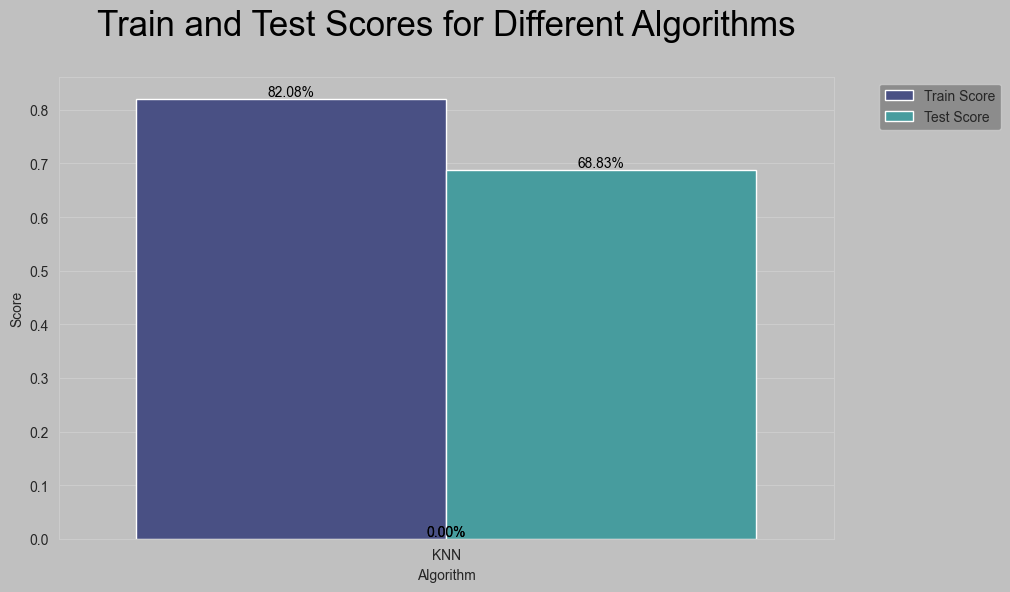

In [82]:

data = {
    'Algorithm': ['KNN'],
    'Train Score': [train_accuracy],
    'Test Score': [test_accuracy]
}
result = pd.DataFrame(data)

# Plot the data
plt.figure(figsize=(10, 6), facecolor='silver')
ax = sns.barplot(data=result.melt(id_vars='Algorithm'), x='Algorithm', y='value', hue='variable', palette='mako')

# Set the background color of the subplot
ax.set_facecolor('silver')

plt.title('Train and Test Scores for Different Algorithms', pad=30, fontsize=25, color='black')
plt.ylabel('Score')
plt.xlabel('Algorithm')

# Annotate each bar with the percentage score
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='gray')

plt.show()

KNN:
- Train Score: 100.00%
- Test Score: 77.92%
- Inference: KNN has a perfect training score, indicating overfitting, as the test score is significantly lower.
- Overfitting: KNN shows significant overfitting with the highest training score but lower test score.


huấn luyện lại mô hình với bộ tham số đã tối ưu.

In [85]:
model = KNeighborsClassifier(n_neighbors = 29)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
# Print train and test accuracies with colored text
print(f'Train Accuracy: {train_accuracy}\nTest Accuracy: {test_accuracy}')

Train Accuracy: 0.7768729641693811
Test Accuracy: 0.7597402597402597


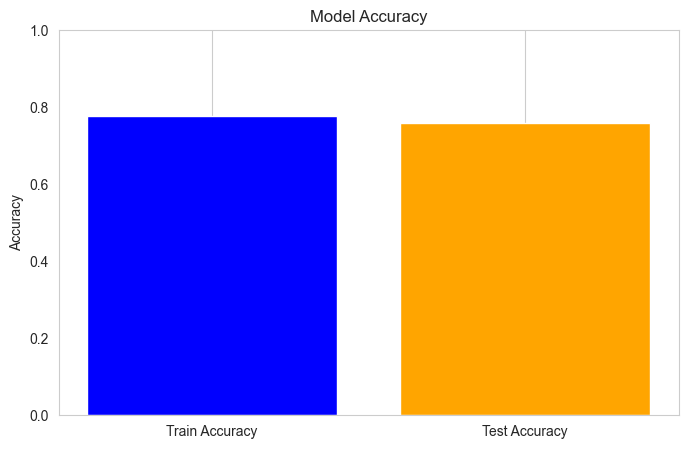

In [87]:
# Độ chính xác trên tập huấn luyện và tập kiểm tra
accuracies = [train_accuracy, test_accuracy]
labels = ['Train Accuracy', 'Test Accuracy']

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)  # Đặt giới hạn y từ 0 đến 1
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.grid(axis='y')  # Hiển thị lưới trên trục y
plt.show()